In [1]:
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import MultiprocessingEvaluator, Policy
from ema_workbench.util import ema_logging
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)
problem_formulation_id = 2
dike_model, planning_steps = get_model_for_problem_formulation(problem_formulation_id)

In [3]:
#this defines policy 1, undertaking no action
#no heightening of dikes, no warning used, none of the rfr projects
zero_policy = {'DaysToThreat': 0}
zero_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
zero_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
    
pol1 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol1.update({key.name: zero_policy[s2]})

In [4]:
#this defines policy 2, only using the full potential of rfr
only_rfr_policy = {'DaysToThreat': 0}
only_rfr_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
only_rfr_policy.update({'RfR {}'.format(n): 1 for n in planning_steps})
    
pol2 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol2.update({key.name: only_rfr_policy[s2]})

In [5]:
#this defines policy 3, only using early warning to a level that it makes difference
only_EWS_policy = {'DaysToThreat': 3}
only_EWS_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
only_EWS_policy.update({'RfR {}'.format(n): 1 for n in planning_steps})
    
pol3 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol3.update({key.name: only_EWS_policy[s2]})

In [6]:
#this defines policy 4, both early warning and rfr fully adopted
combined_rfr_EWS_policy = {'DaysToThreat': 3}
combined_rfr_EWS_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
combined_rfr_EWS_policy.update({'RfR {}'.format(n): 5 for n in planning_steps})
    
pol4 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol4.update({key.name: combined_rfr_EWS_policy[s2]})

In [7]:
###this defines policy 5, only the largest dike increase for all dikes
only_dike_policy = {'DaysToThreat': 0}
only_dike_policy.update({'DikeIncrease {}'.format(n): 10 for n in planning_steps})
only_dike_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
    
pol5 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol5.update({key.name: only_dike_policy[s2]})

In [8]:
###this defines policy 6, largest dike increase for all dikes, all rfr projects
combined_dike_rfr_policy = {'DaysToThreat': 0}
combined_dike_rfr_policy.update({'DikeIncrease {}'.format(n): 10 for n in planning_steps})
combined_dike_rfr_policy.update({'RfR {}'.format(n): 5 for n in planning_steps})
    
pol6 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol6.update({key.name: combined_dike_rfr_policy[s2]})

In [9]:
###this defines policy 7, maximally useful early warning and largest dike increase

combined_dike_EWS_policy = {'DaysToThreat': 3}
combined_dike_EWS_policy.update({'DikeIncrease {}'.format(n): 10 for n in planning_steps})
combined_dike_EWS_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
    
pol7 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol7.update({key.name: combined_dike_EWS_policy[s2]})

In [10]:
###this defines policy 8, using all means by maximal(ly useful) potential
all_combined_policy = {'DaysToThreat': 3}
all_combined_policy.update({'DikeIncrease {}'.format(n): 10 for n in planning_steps})
all_combined_policy.update({'RfR {}'.format(n): 5 for n in planning_steps})
    
pol8 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    pol8.update({key.name: all_combined_policy[s2]})

In [11]:
policy1 = Policy('No Action', **pol1)
policy2 = Policy("Only RfR", **pol2)
policy3 = Policy("Only EWS", **pol3)  
policy4 = Policy('Combined RfR & EWS', **pol4)
policy5 = Policy('Only Dike', **pol5)
policy6 = Policy('Combined Dike & RfR', **pol6)
policy7 = Policy('Combined Dike & EWS', **pol7)
policy8 = Policy('All Combined', **pol8)
policies = [policy1, policy2, policy3, policy4, policy5, policy6, policy7, policy8]



In [12]:
n_scenarios = 12
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = n_scenarios, 
                                            policies = policies)
    experiments, outcomes = results


[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 1000 scenarios * 8 policies * 1 model(s) = 8000 experiments
  0%|                                       | 1/8000 [00:01<3:51:59,  1.74s/it]Traceback (most recent call last):
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py", line 246, in _store_outcomes
    self.results[outcome][case_id,] = outcome_res
KeyError: 'Dike Investment Costs'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/ema_multiprocessing.py", line 253, in run
    self.callback(*result.get())
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py", line 281, in __call__
    self._store_outcomes(experiment.experiment_id, outcomes)
  File "/U

In [13]:
##creating dataframe. 

data = pd.DataFrame.from_dict(outcomes)
data['policy']= experiments['policy']
data.rename(columns = {'Expected Annual Damage':'Expected \nAnnual Damage'}, inplace = True)
if problem_formulation_id == 2:
    data['Total \nInvestment Costs'] = data['Dike Investment Costs']+data['RfR Investment Costs']

#is only used to get a first indication of fraction of 
#suitable options when regarding one of our main goals: less deaths than dike rings 1 & 2
if problem_formulation_id == 3: 
    data['A1_A2_Expected_Deaths'] = data['A.1_Expected Number of Deaths']+ data['A.2_Expected Number of Deaths']
    data['less_deaths'] = data[data['A1_A2_Expected_Deaths']>data['A.3_Expected Number of Deaths']]

data

,Expected \nAnnual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy,Total \nInvestment Costs
0,3.031839e+09,4589384624,NaN,NaN,NaN,No Action,NaN
1,2.732060e+09,0,0.000000e+00,0.0,1.967010,No Action,0.000000e+00
2,2.647940e+09,0,0.000000e+00,0.0,3.089684,No Action,0.000000e+00
3,2.906003e+09,0,0.000000e+00,0.0,2.332387,No Action,0.000000e+00
4,4.885168e+08,0,0.000000e+00,0.0,0.415744,No Action,0.000000e+00
...,...,...,...,...,...,...,...
7995,0.000000e+00,1383104898,1.065600e+10,0.0,0.000000,All Combined,1.203910e+10
7996,0.000000e+00,1383104898,1.065600e+10,0.0,0.000000,All Combined,1.203910e+10
7997,0.000000e+00,1383104898,1.065600e+10,0.0,0.000000,All Combined,1.203910e+10
7998,0.000000e+00,1383104898,1.065600e+10,0.0,0.000000,All Combined,1.203910e+10


In [14]:
pairplot_data = data[['Expected \nAnnual Damage','Total \nInvestment Costs','Evacuation Costs','Expected Number of Deaths']]
pairplot_data

,Expected \nAnnual Damage,Total \nInvestment Costs,Evacuation Costs,Expected Number of Deaths
0,3.031839e+09,NaN,NaN,NaN
1,2.732060e+09,0.000000e+00,0.0,1.967010
2,2.647940e+09,0.000000e+00,0.0,3.089684
3,2.906003e+09,0.000000e+00,0.0,2.332387
4,4.885168e+08,0.000000e+00,0.0,0.415744
...,...,...,...,...
7995,0.000000e+00,1.203910e+10,0.0,0.000000
7996,0.000000e+00,1.203910e+10,0.0,0.000000
7997,0.000000e+00,1.203910e+10,0.0,0.000000
7998,0.000000e+00,1.203910e+10,0.0,0.000000


In [17]:
n_scenarios

1000

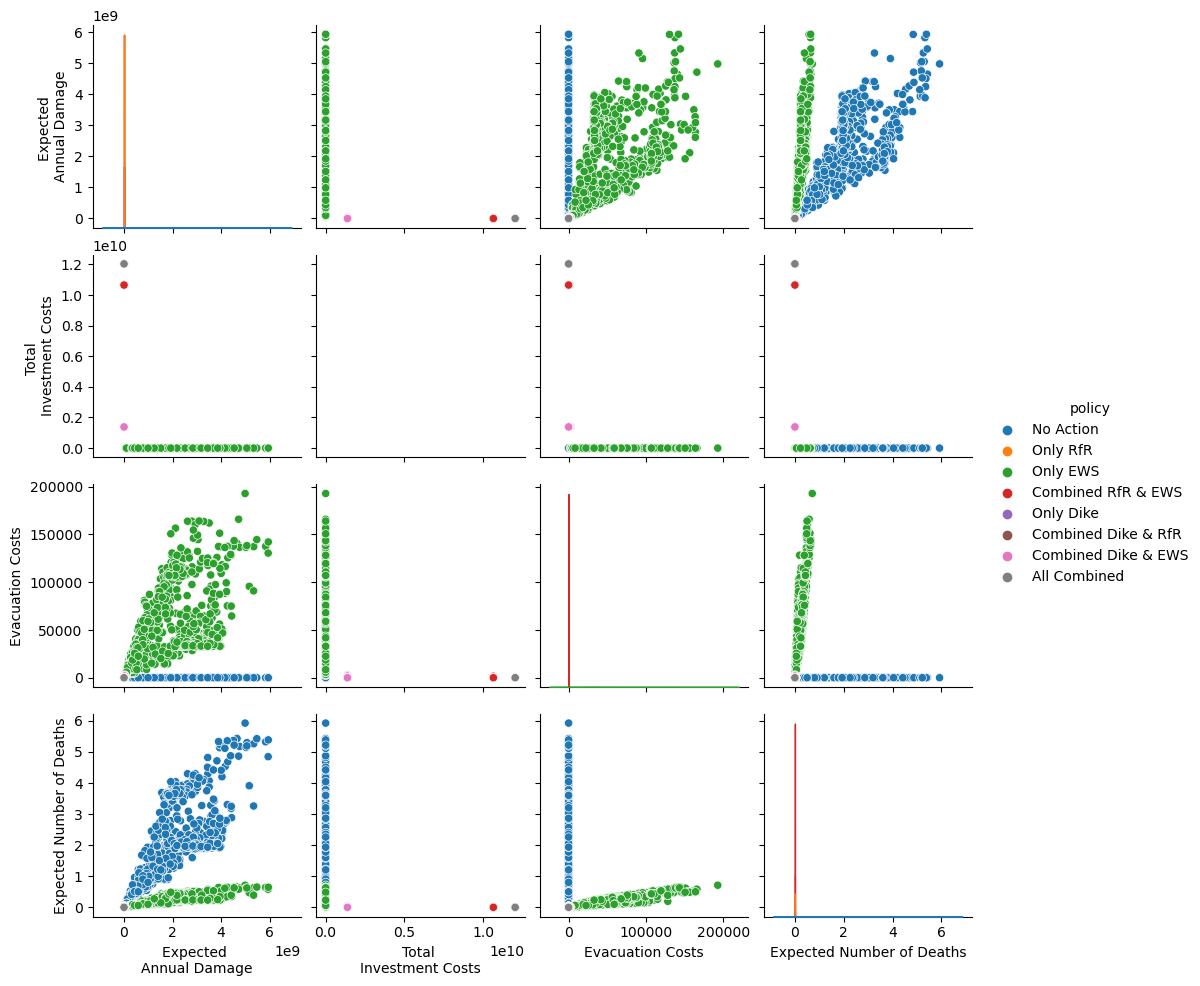

In [19]:
pairplot = sns.pairplot(data, hue='policy',  vars=pairplot_data)
plt.show()
if n_scenarios < 1000:
    pairplot.savefig("fewer_experiments_open_exploration.png")
else:
    pairplot.savefig("8000_experiments_open_exploration.png")

In [16]:
# fraction of experiments conducted that yields less deaths for Zutphen 
# than the Province's rural dike rings together, which is one of our main goals

if problem_formulation_id == 3:
    len(data[data['A1_A2_Expected_Deaths']>data['A.3_Expected Number of Deaths']])/len(data)
    